In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

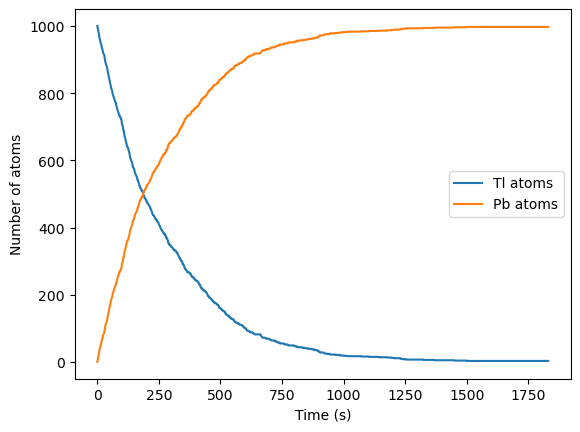

In [22]:
#probability
def p(t,tau):
    return 1- 2**(-t/tau)


hl = 3.052 * 60 # 1 half-life of Tl in seconds


# Initialize the number of Tl and Pb atoms
tl = 1000
pb = 0

# Initialize lists to store the number of Tl and Pb atoms at each time step
tlcounts = [tl]
pbcounts = [pb]


times = np.linspace(0, round(hl*10), round(hl*10)+1, dtype = int)

decay_probability = p(1,hl)

# Simulation
for t in times[1:]:
    for i in range(tlcounts[t-1]):
        if random.random() < decay_probability:
            tl-= 1
            pb+= 1
    tlcounts.append(tl)
    pbcounts.append(pb)


# Plot the results
plt.plot(times, tlcounts, label='Tl atoms')
plt.plot(times, pbcounts, label='Pb atoms')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()




2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

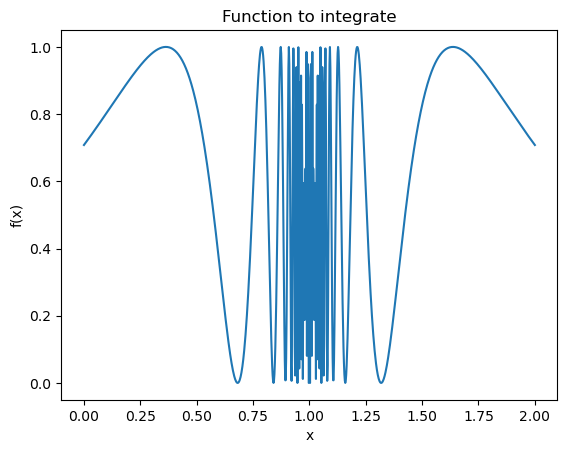

In [32]:
# Define the function
def f(x):
    return (np.sin(1/(1-x)))**2

#plotting the function
N = 1000
xs=np.linspace(0,2,N)

fig=plt.figure()
plt.title('Function to integrate')
plt.plot(xs,f(xs))
plt.xlabel('x')
plt.ylabel('f(x)');

In [ ]:
def hitmiss(f,D,R,N)
    N = 100000
    count = 0
    for i in range(N):
        x_rand = 2 * np.random.random() 
        y_rand = np.random.random()     
        if y_rand < f(x_rand): count += 1
    I = ((R-N)/N)* count
    return I

def mean_integral(f, domain=(0,1), N=100000):
    xrand = npr.uniform(domain[0], domain[1], size=N)
    integral = f(xrand).sum()
    return float(domain[1] - domain[0]) / N * integral

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [83]:
import numpy as np

def ucirc(x,y):
    return x**2 + y**2 

a=-1
b=1
N=100000
integral=0.0

xrand = np.random.uniform(a, b, size=N)
yrand = np.random.uniform(a, b, size=N)

integral = np.sum(ucirc(xrand, yrand) <= 1)

I = (b - a)**2 * integral/ float(N) 
    
print('Area of ther circle of unit radius:',I)

Area of ther circle of unit radius: 3.15516


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

Integral value with importance sampling: 0.8389997381537531


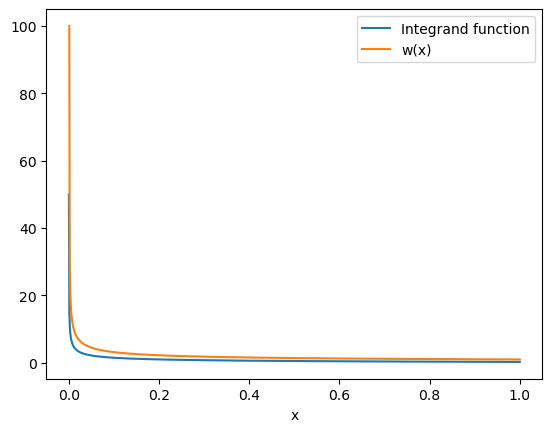

In [44]:
#function to integrate
def f(x):
    return x**(-1/2)/(np.exp(x)+1)

#weight function
def w(x):
    return 1/np.sqrt(x)

#inverse transform method
def invtrans(x):
    return x**2/4

#plotting
x = np.linspace(0.0001, 1, 1000)
fig = plt.figure()
plt.plot(x, f(x), label='Integrand function')
plt.plot(xs, w(x), label='w(x)')
plt.xlabel('x')
plt.legend()

#inverse transform method 
N = 10**6
y = np.random.uniform(0, 2, size=N) 
x = invtrans(y)

#integration with importance sampling
I = 1/N * np.sum(f(x)/w(x)) * 2.   

print(f'Integral value with importance sampling: {I}')
